In [123]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from IPython.display import Image

# Machine learning with Python
* Intent is to show you how a data scientist would approach a data mining problem

# Import the libraries that we will need

In [2]:
# Numerical libraries
import numpy as np
import pandas as pd

# SVD or use with Principal component analysis
from numpy.linalg import svd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
% matplotlib inline

pd.options.display.max_columns = 999

UsageError: Line magic function `%` not found.


### Picture of cereals here

# Dataset - Cereals
* This is a dataset from kaggle.com which contains nutritional information for 77 different retail cereal brands
* What information can we find from this dataset using machine data analysis and our wits?

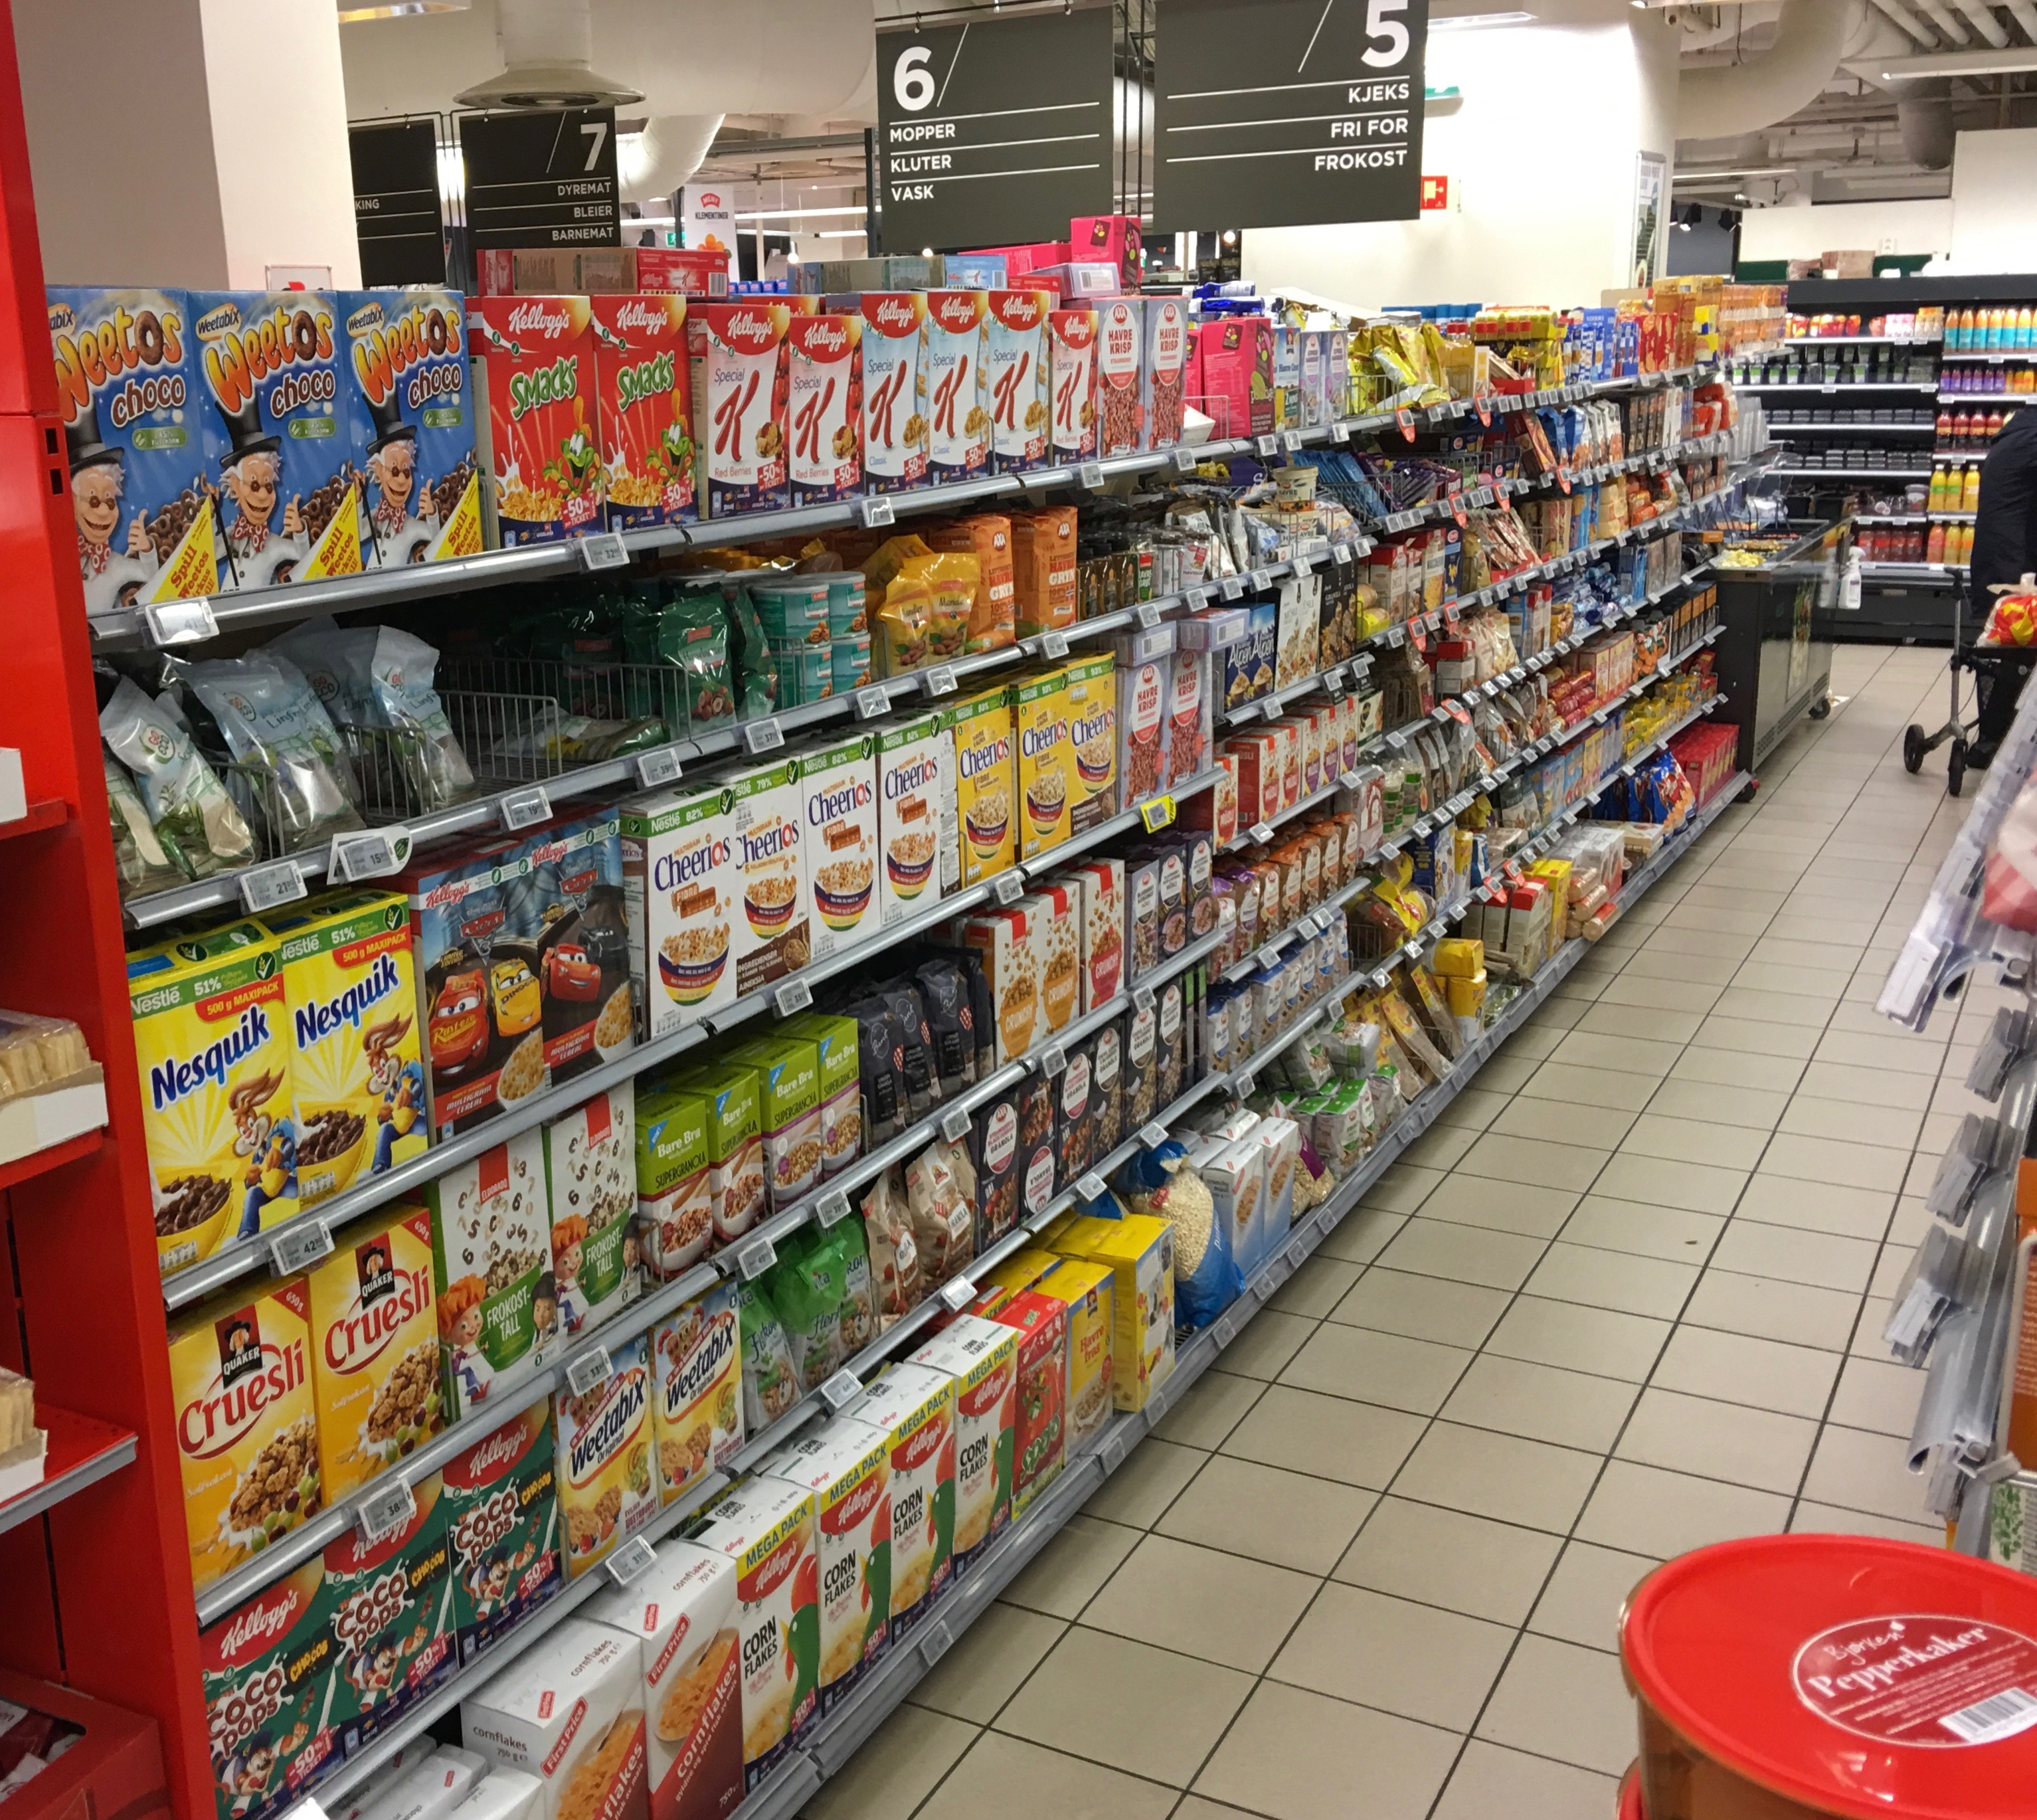

In [135]:
Image(filename='cereals.jpg', width=500, height=250) 

# Pandas
* Pandas is a tool that allows for convenient manipulation of 'rectangular' data sets
* It allows us to easily load data from text files into an ordered table
* There are a lot of built in functions that allow us to conveniently perform calculations

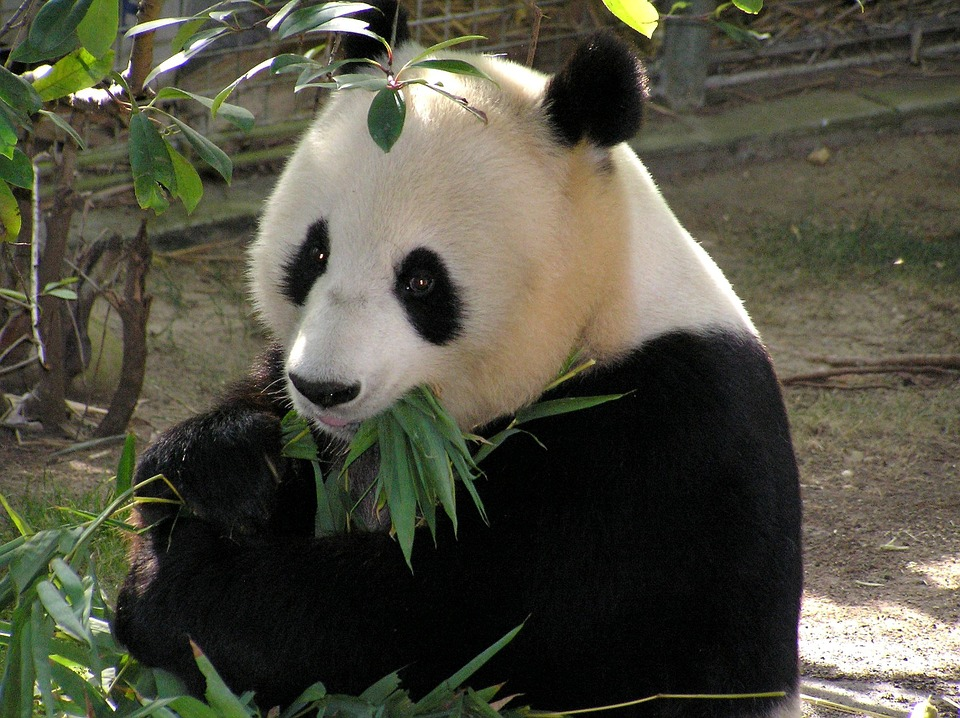

In [137]:
Image(filename='panda.jpg', width=500, height=250) 

In [11]:
df = pd.read_csv('cereal.csv', delimiter=' ', header=None)

In [12]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6,3,280,25,1.0,0.33
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8,3,135,0,1.0,-1.00
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,3,320,25,1.0,0.33
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0,3,330,25,1.0,0.50
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8,3,-1,25,1.0,0.75


### Generate several different sets of columns for use later
* new_cols is just a renaming of the columns that came with the dataset
* numeric_cols is the numerical columns
* nutrition_cols is the set of columns with direct nutritional information

In [21]:
new_cols = ['NAME', 'MANUFACTURER', 'TYPE', 'CALORIES', 'PROTEIN', 'FAT', 'SODIUM', 'FIBER', 'C_CARBS', 'SUGARS',
            'SHELF', 'POTASSIUM', 'VITAMINS', 'SERVING_WEIGHT', 'SERVING_CUPS']
numeric_cols = ['CALORIES', 'PROTEIN', 'FAT', 'SODIUM', 'FIBER', 'C_CARBS', 'SUGARS', 'POTASSIUM', 'SHELF', 'VITAMINS', 'SERVING_WEIGHT', 'SERVING_CUPS']
nutrition_cols = ['CALORIES', 'PROTEIN', 'FAT', 'SODIUM', 'FIBER', 'C_CARBS', 'SUGARS', 'POTASSIUM', 'VITAMINS']

In [15]:
df.columns = new_cols
df.head()

,NAME,MANUFACTURER,TYPE,CALORIES,PROTEIN,FAT,SODIUM,FIBER,C_CARBS,SUGARS,SHELF,POTASSIUM,VITAMINS,SERVING_WEIGHT,SERVING_CUPS
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6,3,280,25,1.0,0.33
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8,3,135,0,1.0,-1.00
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,3,320,25,1.0,0.33
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0,3,330,25,1.0,0.50
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8,3,-1,25,1.0,0.75


### Reset the index so that it is based on cereal names

In [18]:
df = df.set_index('NAME')

In [19]:
df.head()

,MANUFACTURER,TYPE,CALORIES,PROTEIN,FAT,SODIUM,FIBER,C_CARBS,SUGARS,SHELF,POTASSIUM,VITAMINS,SERVING_WEIGHT,SERVING_CUPS
NAME,,,,,,,,,,,,,,
100%_Bran,N,C,70,4,1,130,10.0,5.0,6,3,280,25,1.0,0.33
100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8,3,135,0,1.0,-1.00
All-Bran,K,C,70,4,1,260,9.0,7.0,5,3,320,25,1.0,0.33
All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0,3,330,25,1.0,0.50
Almond_Delight,R,C,110,2,2,200,1.0,14.0,8,3,-1,25,1.0,0.75


### Now, it actually looks like somehting that we can use for data analysis

# Principal component analysis
* This is a concept of 'Dimensionality Reduction' that is commonly used in the statistics and machine learning fields to recude the size of a data set in order to:
    * Extract information from the data
    * Make the data easier to interpret or process
    * Allow for better visualization of data

In [51]:
# Make a copy of the data, since we are going to modify it
dfsvd = df.copy()

# Standardize the data (Subtract the mean from each column, divide by the standard deviation)
# The purpose here is to make sure that all columns have the same 'importance' in the subsequent analysis
for col in numeric_cols:
    dfsvd[col] = (dfsvd[col] - dfsvd[col].mean()) / dfsvd[col].std()

# Implement the PCA via Singular Value Decomposition (SVD)
u,s,vt = svd(dfsvd[numeric_cols])

### Scree Plot:
* Plot the singular values (normalized to remove scaling ambiguities) from the SVD as a quality control measure
* Larger value show more importance
* Gives a notion of how well the data is compressed

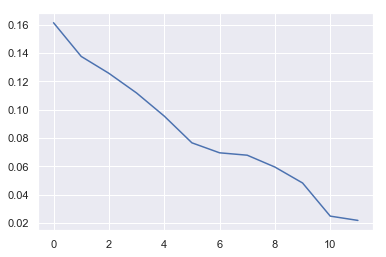

In [52]:
plt.plot(s/sum(s))

### Scatter plot of the principal components data as a general data summary

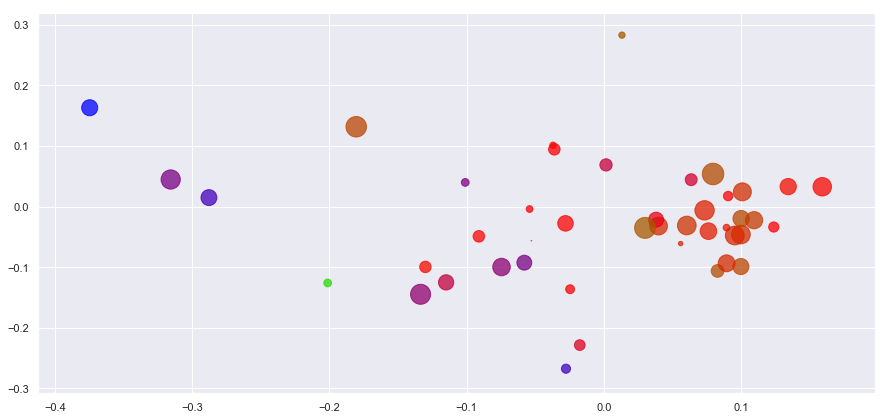

In [53]:
idx = 0

plt.figure(figsize=(15, 7))
plt.scatter(u[:,idx], u[:,idx+1], c=u[:,idx+2], s=2500*u[:,idx+3]+15, cmap='brg', alpha=0.75)

### Plot the various nutritional information using the PCA decomposition as a basis for visualization

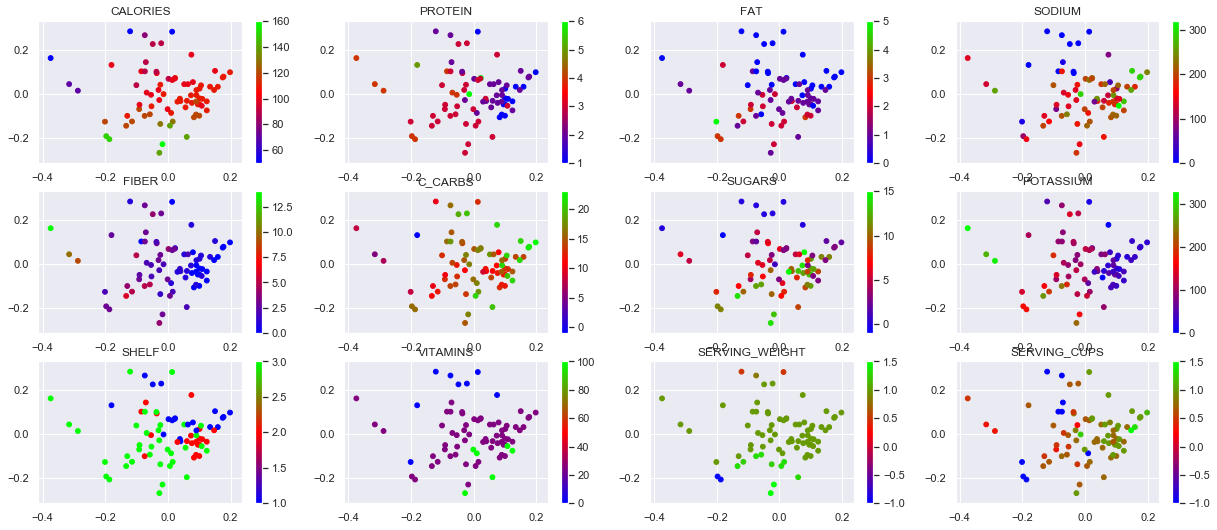

<Figure size 432x288 with 0 Axes>

In [59]:
plt.figure(figsize=(21,12))
for i, col in enumerate(numeric_cols):
    plt.subplot(4,4,i+1)
    plt.scatter(u[:,0], u[:,1], c=df[col], s=23, cmap='brg')
    plt.colorbar()
    plt.title(col)
plt.show()
plt.tight_layout();

### This is just an overview of the dataset.  Next, we will ask more questions of the data,

# Question #1 - How does the nutritional content vary across the different manufacturers?

### Notes:
* The manufacturer is coded by a single letter in the input data set
* To make this more human readable, we will replace the single letter by the names fo the manufacturers
* We will also create a map between the manufacturers to an integer number to be able to better display them

In [114]:
df['MANUFACTURER_int'] = df['MANUFACTURER'].copy()
mapping = dict(zip(df['MANUFACTURER'].unique(), range(df['MANUFACTURER'].unique().shape[0])))
df['MANUFACTURER_int'] = df.replace({'MANUFACTURER_int':mapping})['MANUFACTURER_int']

### Create a new dataframe of the mean (average) of each column using pandas convenience function
* Index the new data frame by the manufacturer name

In [115]:
df_stats = df.groupby('MANUFACTURER').agg(np.mean)
manufacturer_names = ['American Home Food Products', 'General Mills', 'Kellogs', 'Nabisco', 'Post', 'Quaker', 'Rastlon-Purina']
df_stats.index = manufacturer_names

In [119]:
df_stats

,CALORIES,PROTEIN,FAT,SODIUM,FIBER,C_CARBS,SUGARS,SHELF,POTASSIUM,VITAMINS,SERVING_WEIGHT,SERVING_CUPS,MANUFACTURER_int
American Home Food Products,100.000000,4.000000,1.000000,0.000000,0.000000,16.000000,3.000000,2.000000,95.000000,25.000000,1.000000,-1.000000,6.0
General Mills,111.363636,2.318182,1.363636,200.454545,1.272727,14.727273,7.954545,2.136364,85.227273,35.227273,1.049091,0.875000,4.0
Kellogs,108.695652,2.652174,0.608696,174.782609,2.739130,15.130435,7.565217,2.347826,103.043478,34.782609,1.077826,0.622174,2.0
Nabisco,86.666667,2.833333,0.166667,37.500000,4.000000,16.000000,1.833333,1.666667,120.666667,8.333333,0.971667,0.111667,0.0
Post,108.888889,2.444444,0.888889,146.111111,2.777778,13.222222,8.777778,2.444444,113.888889,25.000000,1.064444,0.714444,5.0
Quaker,95.000000,2.625000,1.750000,92.500000,1.337500,10.000000,5.250000,2.375000,74.375000,12.500000,0.875000,0.323750,1.0
Rastlon-Purina,115.000000,2.500000,1.250000,198.125000,1.875000,17.625000,6.125000,2.000000,89.250000,25.000000,0.500000,0.371250,3.0


# Now, we will normalize the data frame so that we can more easily compare the values of each field

In [121]:
df_stats_norm = df_stats.copy()
df_stats.columns.difference(['SERVING_CUPS'])

for col in df_stats_norm.columns:
    df_stats_norm[col] = df_stats_norm[col] / df_stats_norm[col].mean()

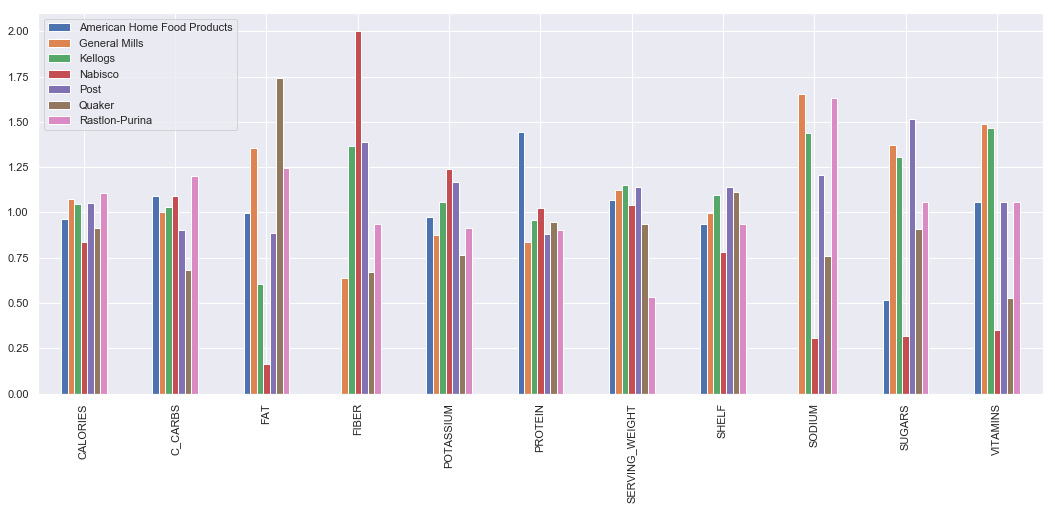

In [122]:
df_stats_norm[df_stats.columns.difference(['SERVING_CUPS', 'MANUFACTURER_int'])].T.plot.bar(figsize=(18,7))

# Plan is to draw some conclusions here, and to ask some more questions which can be addressed later
* Will also likely include some supervised learning here since this is another field of machine learning that people will likely be interested in